In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy

use_refiner = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.4 MB/s eta 0:00:00


In [2]:
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

if use_refiner:
  refiner = DiffusionPipeline.from_pretrained(
      "stabilityai/stable-diffusion-xl-refiner-1.0",
      text_encoder_2=pipe.text_encoder_2,
      vae=pipe.vae,
      torch_dtype=torch.float16,
      use_safetensors=True,
      variant="fp16",
  )

  refiner = refiner.to("cuda")

  pipe.enable_model_cpu_offload()
else:
  pipe = pipe.to("cuda")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	a photo protrait of girl, wearing sunglasses, red blue hair, realistic, high resolution, HD quality
Seed:	1230608096900904562


""

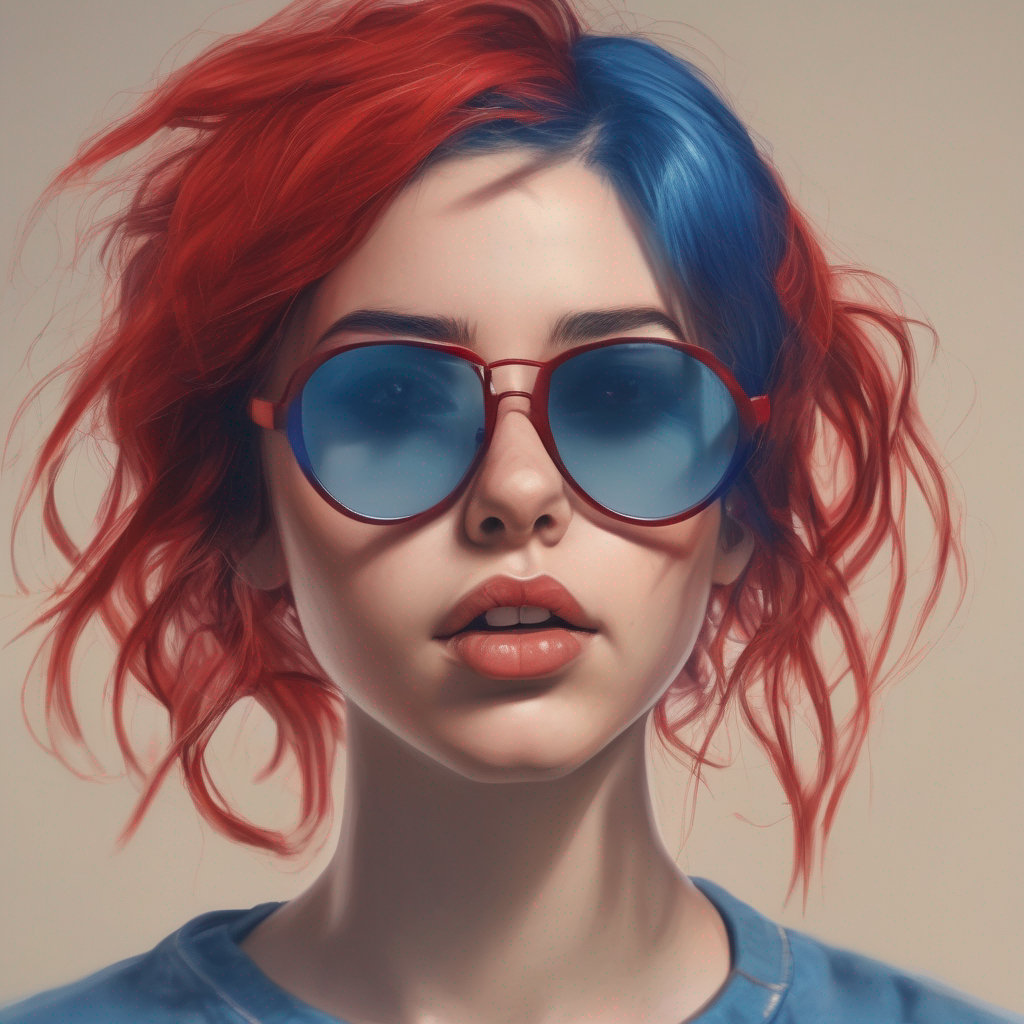

In [4]:
prompt = "a photo protrait of girl, wearing sunglasses, red blue hair, realistic, high resolution, HD quality"
seed = random.randint(0, sys.maxsize)

images = pipe(
    prompt = prompt,
    output_type = "latent" if use_refiner else "pil",
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

if use_refiner:
  images = refiner(
      prompt = prompt,
      image = images,
      ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")